# Install Auto Arima

In [29]:
!pip install pmdarima

In [65]:
#import all important modules
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime
import pandas as pd
import pmdarima as pm

import warnings
warnings.filterwarnings("ignore")

# Example 1

In [2]:
 df = sm.datasets.get_rdataset("uschange", "fpp2").data

In [3]:
df.index = pd.date_range(start = datetime(1970,1,1), end=datetime(2016, 9,30), freq='Q')
df.index.name = 'quarter'

In [4]:
df.head(5)

,Consumption,Income,Production,Savings,Unemployment
quarter,,,,,
1970-03-31,0.615986,0.972261,-2.452700,4.810312,0.9
1970-06-30,0.460376,1.169085,-0.551525,7.287992,0.5
1970-09-30,0.876791,1.553271,-0.358708,7.289013,0.5
1970-12-31,-0.274245,-0.255272,-2.185455,0.985230,0.7
1971-03-31,1.897371,1.987154,1.909734,3.657771,-0.1


# plot the data

Text(0.5, 0.98, 'Quarterly changes in US consumption and personal income')

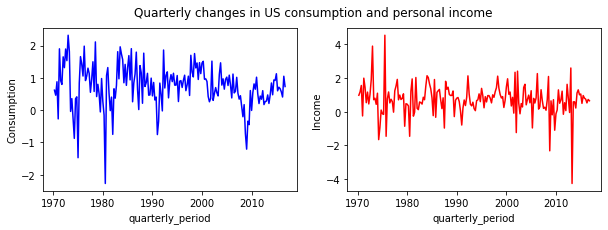

In [5]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(1,2,1)
ax.plot(df['Consumption'], color='blue')
ax.set_ylabel('Consumption')
ax.set_xlabel('quarterly_period')
ax2 =f.add_subplot(1,2,2)
ax2.plot(df['Income'], color = 'red')
ax2.set_ylabel('Income')
ax2.set_xlabel('quarterly_period')
f.suptitle('Quarterly changes in US consumption and personal income')

# ADF Test
The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.
H0: Null hypothesis is that there is unit root
H1: Alternate hypothesis time series is stationary

##### DF test:  
          y(t) = c + theta_1 * (t) + alpha * (y(t-1)) + theta_2 * (delta(y(t-1)) + error(t)
          y(t-1): lag1 of time seris
          delta(y(t-1)): first differences of the series at time t-1
          c: constant
          H0: alpha=1
          
##### ADF test: add higher order difference terms, adds more thoroughness to the test
          y(t) = c + theta_1 * (t) + alpha * (y(t-1)) + theta_2 * (delta(y(t-1)) + theta_3 * delta(y(t-2)) + error(t)
          

#### Caution: Like most unit root tests it has relatively high type I error rate

##### things to check before running ADF test
     1.) Choose regression models
         a.) No constant, no trend (nc)
         b.) Constant and trend (ct)
         c.) constant, & linear & quadratic trend (ctt)
         d.) constant only (c)  (when you see the mean is diffrently from zero)
     2.) lag length should be chosen so that residuals aren't serially correlated. There are several options 
         such as AIC or BIC or starts with maxlag & drop the lags until last lag is statiscally significant


In [29]:
def printAdfResult(result, alpha=0.05):
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[2]}')
    print(f'p-value: {result[1]}')
    print(f'n_obs: {result[3]}')
    print(f'Information Criteria Value: {result[5]}')
    if(result[1]<0.05):
        print('############# result is stationary ####')
    else:
        print('############result is not stationary #####')
    
    print('Critial Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')   
        
def check_adf_all_params(ts, default=True):
    print('\nchecking for constant')
    res = sm.tsa.stattools.adfuller(ts, autolag='AIC', regresults=False, store=False)
    printAdfResult(res)
    if not default:
        print('\nchecking for constant & trend')
        res = sm.tsa.stattools.adfuller(ts, regression= 'ct',autolag='AIC', regresults=False, store=False)
        printAdfResult(res)
        
        print('\nchecking for constant & linear & quadratic trend')
        res = sm.tsa.stattools.adfuller(ts, regression= 'ctt',autolag='AIC', regresults=False, store=False)
        printAdfResult(res)
        
        print('\nchecking for no constant & no trend')
        res = sm.tsa.stattools.adfuller(ts, regression= 'nc',autolag='AIC', regresults=False, store=False)
        printAdfResult(res)
        
    return None
        

In [30]:
#check stationarity of both data points
print('testing stationarity of consumption')

check_adf_all_params(df['Consumption'], default=False)


print('#################### \n\n')
print('testing stationarity of income')
check_adf_all_params(df['Income'], default=True)

testing stationarity of consumption

checking for constant
ADF Statistic: -4.522487471075186
n_lags: 2
p-value: 0.00017903842233446071
n_obs: 184
Information Criteria Value: 297.6963136048823
############# result is stationary ####
Critial Values:
   1%, -3.466398230774071
   5%, -2.8773796387256514
   10%, -2.575213838610586

checking for constant & trend
ADF Statistic: -4.640511122904467
n_lags: 2
p-value: 0.0008812497144557214
n_obs: 184
Information Criteria Value: 298.7733402917287
############# result is stationary ####
Critial Values:
   1%, -4.008832839770228
   5%, -3.434625048376243
   10%, -3.141221698677776

checking for constant & linear & quadratic trend
ADF Statistic: -4.6457852640093975
n_lags: 2
p-value: 0.003904752853104012
n_obs: 184
Information Criteria Value: 300.2927685653914
############# result is stationary ####
Critial Values:
   1%, -4.435220952056536
   5%, -3.86487409876613
   10%, -3.5733156719443473

checking for no constant & no trend
ADF Statistic: -2.38

In [ ]:
arima_model = auto_arima()

## Non-Seasonal Auto Arima Models

### ACF Plots

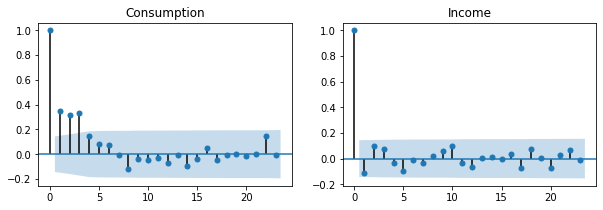

In [75]:
f2 = plt.figure(figsize=(10,3))
ax = f2.add_subplot(121)
pm.plot_acf(df['Consumption'], title='Consumption',ax=ax, alpha=0.05, show=False)
ax1 = f2.add_subplot(122)
pm.plot_acf(df['Income'], title='Income',ax=ax1, alpha=0.05, show=False)
f.suptitle('ACF Plots')
plt.show()

## PACF Plots

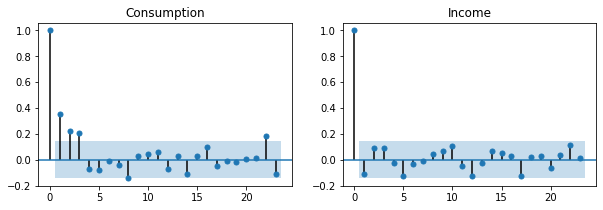

Text(0.5, 0.98, 'PACF Plots')

In [76]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
pm.plot_pacf(df['Consumption'], title = 'Consumption',ax=ax, alpha=0.05, show=False)
pm.plot_pacf(df['Income'], title = 'Income',ax=ax1, alpha=0.05, show=False)
plt.show()
f.suptitle('PACF Plots')

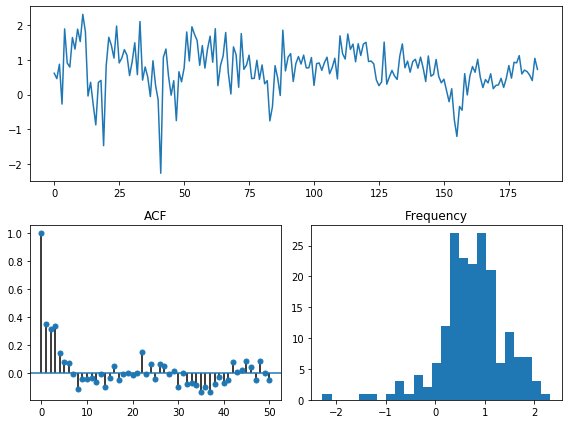

In [97]:
from pmdarima.utils import tsdisplay
tsdisplay(df['Consumption'])

### Calculate d Parameter

In [90]:
# Estimate the number of differences using an ADF test:
y = df[['Consumption']]
n_adf = pm.arima.utils.ndiffs(y, test='adf')  # -> 0

# Or a KPSS test (auto_arima default):
n_kpss = pm.arima.utils.ndiffs(y, test='kpss')  # -> 0

# Or a PP test:
n_pp = pm.arima.utils.ndiffs(y, test='pp')  # -> 0
assert n_adf == n_kpss == n_pp == 0

######  Stepwise Vs Parallel
The parallel approach is a naive, brute force grid search over various combinations of hyper parameters. It will commonly take longer for several reasons. First of all, there is no intelligent procedure as to how model orders are tested; they are all tested (no short-circuiting), which can take a while.

,Consumption,Income,Production,Savings,Unemployment
quarter,,,,,
2011-12-31,0.335939,0.060747,0.851517,-3.454477,-0.5
2012-03-31,0.601090,1.622049,0.886518,17.625305,-0.3
2012-06-30,0.169430,0.766895,0.629236,8.969497,0.0
2012-09-30,0.264160,-0.050715,0.078802,-3.049222,-0.4
2012-12-31,0.278772,2.591067,0.633055,29.046704,0.1
2013-03-31,0.468613,-4.265250,0.677132,-68.788267,-0.4
2013-06-30,0.205458,0.581465,0.307450,7.816477,0.0
2013-09-30,0.466418,0.583289,0.234409,3.494007,-0.3
2013-12-31,0.839174,0.214949,0.792087,-11.276615,-0.5


In [176]:
stepwise_fit = pm.auto_arima(df.iloc[:-20][['Consumption']], exogenous = df.iloc[:-20][['Income']],
                             start_p=1, start_q=1,
                             max_p=3, max_q=3,
                             seasonal=False,
                             d=0, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise


Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=306.632, BIC=322.222, Time=0.148 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=317.151, BIC=326.505, Time=0.045 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=314.964, BIC=327.436, Time=0.058 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=316.896, BIC=329.368, Time=0.060 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=373.479, BIC=379.715, Time=0.039 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=304.061, BIC=322.769, Time=0.130 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=304.392, BIC=319.982, Time=0.074 seconds
Fit ARIMA: (3, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=305.113, BIC=326.939, Time=0.147 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=304.514, BIC=326.340, Time=0.191 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=303.294, BIC=322.002, Time=0.159 seco

In [177]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  167
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -145.647
Date:                Sun, 16 Aug 2020   AIC                            303.294
Time:                        17:59:21   BIC                            322.002
Sample:                    03-31-1970   HQIC                           310.887
                         - 09-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1844      0.075      2.469      0.014       0.038       0.331
Income         0.2541      0.041      6.127      0.000       0.173       0.335
ar.L1          0.6775      0.134      5.071      0.000       0.416       0.939
ma.L1         -0.5739      0.139     -4.140      0.000      -0.846      -0.302
ma.L2          0.1978      0.079      2.512      0.012       0.043       0.352
sigma2         0.3345      0.029     11.490      0.000       0.277       0.392
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.84
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Pipeline

In [178]:
# from pmdarima.pipeline import Pipeline
# from pmdarima.preprocessing import BoxCoxEndogTransformer, LogEndogTransformer

# pipeline = Pipeline([
#     ("boxcox", BoxCoxEndogTransformer()),
#     ("model", pm.AutoARIMA(seasonal=False, suppress_warnings=True))
# ])

# pipeline.fit(df['Consumption'])
# pipeline.predict(5)

# ## forecast will be on the same scale as the original data, pipeline is smart enough to take care of that

## Forecast

In [179]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = stepwise_fit  # seeded from the model we've already fit

def forecast_one_step(model, exo=None):
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True, exogenous=exo)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

y_test = df.iloc[-20:]
for index, row in y_test.iterrows():
    x = pd.DataFrame(index = [index], columns=['Income'], data=[row['Income']])
    x.index.name='quarter'
    y = pd.DataFrame(index = [index], columns=['Consumption'], data=[row['Consumption']])
    y.index.name='quarter'
    fc, conf = forecast_one_step(model, exo= x)
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(y, exogenous=x)

print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

ValueError: A constant trend was included in the model specification, but the `exog` data already contains a column of constants.

In [171]:
for index, row in y_test.iterrows():
    x = pd.DataFrame(index = [index],columns=['Income'], data=[row['Income']])
    x.index.name='quarter'
    print(x.shape)
    y = pd.DataFrame(index = [index], columns=['Consumption'], data=[row['Consumption']])[['Consumption']]
    

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)


In [169]:
?stepwise_fit.predict

In [167]:
np.array(range(1,14))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
np.array([1])